# The mathematical building blocks of neural networks

## A first look at a neural network

**Loading the MNIST dataset in Keras**

In [1]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [2]:
train_images.shape 
#28*28 pixels

(60000, 28, 28)

In [3]:
len(train_labels)

60000

In [4]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [5]:
test_images.shape

(10000, 28, 28)

In [3]:
len(test_labels)

10000

In [13]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

**The network architecture**

In [2]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([ #簡單的一層一層layers用sequential方法就好
    layers.Dense(512, activation="relu", input_shape = (28 * 28,)),
    layers.Dense(10, activation="softmax")
])
#input: 28*28 = 784維
#hidden: 512維(512個神經元)
#input: 10維 mnist答案0-9，有10個
#softmax概念:讓10個神經元輸出都變成0-1，變成求機率的概念，誰大就有可能是那個數字


2022-10-04 00:22:23.909745: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
model.summary()
#第一層要估計的參數: (784 + 1) * 512 = 401920
#(512 + 1) * 10 = 5130

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


**The compilation step**

In [3]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
#分類問題通常用crossentropy

**Preparing the image data**

In [4]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

### 給分類模型編號
>         0 1 2 3 4 5 6 7 8 9
> 5變成[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]


In [91]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [5]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [9]:
train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [95]:
train_labels.shape

(60000, 10)

**"Fitting" the model**

In [6]:
model.fit(train_images, train_labels, epochs=5, batch_size=128) 
#batch_size:每次丟進去的數量(一次60000電腦會爆)，通常是2的次方

Epoch 1/5
469/469 [==============================] - 3s 6ms/step - loss: 0.2578 - accuracy: 0.9257
Epoch 2/5
469/469 [==============================] - 4s 7ms/step - loss: 0.1049 - accuracy: 0.9692
Epoch 3/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0689 - accuracy: 0.9797
Epoch 4/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0499 - accuracy: 0.9851
Epoch 5/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0376 - accuracy: 0.9891


**Using the model to make predictions**

In [7]:
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]

1/1 [==============================] - 0s 91ms/step


array([1.9100777e-09, 1.0778496e-09, 9.3144581e-07, 6.9847687e-05,
       7.8404592e-12, 5.0952211e-09, 2.9872635e-13, 9.9992776e-01,
       2.1150788e-08, 1.3710902e-06], dtype=float32)

In [8]:
predictions[0].argmax()

7

In [9]:
predictions[0][7]

0.99992776

In [10]:
test_labels[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

**Evaluating the model on new data**

In [15]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

313/313 [==============================] - 1s 3ms/step - loss: 0.0636 - accuracy: 0.9802
test_acc: 0.9801999926567078


## Data representations for neural networks

### Scalars (rank-0 tensors)

In [1]:
import numpy as np
x = np.array(12)
x

array(12)

In [2]:
x.ndim #維度

0

In [3]:
x.shape

()

### Vectors (rank-1 tensors)

In [5]:
x = np.array([12, 3, 6, 14, 7])
x

array([12,  3,  6, 14,  7])

In [6]:
x.ndim

1

In [7]:
x.shape

(5,)

### Matrices (rank-2 tensors)

In [8]:
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])
x.ndim

2

In [9]:
x.shape

(3, 5)

### Rank-3 and higher-rank tensors

In [11]:
x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])
x.ndim

3

In [12]:
x.shape #3個 3 * 5 的矩陣

(3, 3, 5)

In [13]:
x = np.random.randint(30, size=(3, 2, 2, 4)) #隨機產生30個數字，維度是 3 2 2 4
x

array([[[[16,  5, 14, 13],
         [ 9, 23, 12, 15]],

        [[ 3, 26, 13, 14],
         [21, 23,  4,  3]]],


       [[[13, 24,  0, 27],
         [27, 26, 11, 12]],

        [[17, 11, 22,  1],
         [28,  6,  2, 26]]],


       [[[ 0,  8, 16, 25],
         [20, 16,  5, 26]],

        [[12, 29,  9, 13],
         [27,  5, 11, 22]]]])

### Key attributes

In [14]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [23]:
train_images.ndim

3

In [24]:
train_images.shape

(60000, 28, 28)

In [25]:
train_images.dtype

dtype('uint8')

**Displaying the fourth digit**

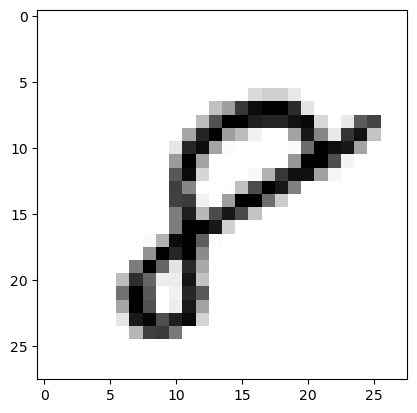

In [18]:
import matplotlib.pyplot as plt
digit = train_images[-1]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [17]:
train_labels[-1]

8

In [20]:
digit.shape

(28, 28)

In [21]:
digit

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

### Manipulating tensors in NumPy

In [28]:
my_slice = train_images[10:100]
my_slice.shape

(90, 28, 28)

In [29]:
my_slice = train_images[10:100, :, :]
my_slice.shape

(90, 28, 28)

In [30]:
my_slice = train_images[10:100, 0:28, 0:28]
my_slice.shape

(90, 28, 28)

In [22]:
my_slice = train_images[:, 14:, 14:]
my_slice.shape

(60000, 14, 14)

In [23]:
my_slice = train_images[:, 7:-7, 7:-7]
my_slice.shape

(60000, 14, 14)

### The notion of data batches

In [33]:
batch = train_images[:128]

In [34]:
batch = train_images[128:256]

In [35]:
n = 3
batch = train_images[128 * n:128 * (n + 1)]

### Real-world examples of data tensors

### Vector data

### Timeseries data or sequence data

### Image data

### Video data

## The gears of neural networks: tensor operations

### Element-wise operations

In [36]:
def naive_relu(x):
    assert len(x.shape) == 2
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
    return x

In [37]:
def naive_add(x, y):
    assert len(x.shape) == 2
    assert x.shape == y.shape
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    return x

In [38]:
import time

x = np.random.random((20, 100))
y = np.random.random((20, 100))

t0 = time.time()
for _ in range(1000):
    z = x + y
    z = np.maximum(z, 0.)
print("Took: {0:.2f} s".format(time.time() - t0))

Took: 0.01 s


In [39]:
t0 = time.time()
for _ in range(1000):
    z = naive_add(x, y)
    z = naive_relu(z)
print("Took: {0:.2f} s".format(time.time() - t0))

Took: 4.76 s


### Broadcasting

In [4]:
import numpy as np
X = np.random.random((32, 10))

In [5]:
y = np.random.random((10,))
y

array([0.13997364, 0.87722551, 0.95596375, 0.61700836, 0.21535288,
       0.28415273, 0.15710767, 0.61212813, 0.87428861, 0.30301841])

In [6]:
y = np.expand_dims(y, axis=0)

In [7]:
y.shape

(1, 10)

In [8]:
Y = np.concatenate([y] * 32, axis=0)

In [10]:
Y.shape

(32, 10)

In [14]:
def naive_add_matrix_and_vector(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[j]
    return x

In [17]:
import numpy as np
x = np.random.random((64, 3, 32, 10))
y = np.random.random((32, 10 ))
z = np.maximum(x, y)

In [18]:
z.shape #可以說y已經被廣播了，因為變成跟x一樣維度

(64, 3, 32, 10)

---

In [20]:
x = np.random.randint(30, size=(2,4)) #數字範圍0-29
x

array([[19, 28, 20, 25],
       [ 7, 15, 12, 20]])

In [21]:
y = x.sum(axis=0) #axis=0是y軸
y

array([26, 43, 32, 45])

In [22]:
z = x / y
z

array([[0.73076923, 0.65116279, 0.625     , 0.55555556],
       [0.26923077, 0.34883721, 0.375     , 0.44444444]])

### Tensor product

In [45]:
x = np.random.random((32,))
y = np.random.random((32,))
z = np.dot(x, y)

In [46]:
def naive_vector_dot(x, y):
    assert len(x.shape) == 1
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]
    z = 0.
    for i in range(x.shape[0]):
        z += x[i] * y[i]
    return z

In [47]:
def naive_matrix_vector_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i] += x[i, j] * y[j]
    return z

In [48]:
def naive_matrix_vector_dot(x, y):
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        z[i] = naive_vector_dot(x[i, :], y)
    return z

In [49]:
def naive_matrix_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 2
    assert x.shape[1] == y.shape[0]
    z = np.zeros((x.shape[0], y.shape[1]))
    for i in range(x.shape[0]):
        for j in range(y.shape[1]):
            row_x = x[i, :]
            column_y = y[:, j]
            z[i, j] = naive_vector_dot(row_x, column_y)
    return z

---

In [23]:
x = np.random.randint(5, size=(2,3,4,5))
x

array([[[[4, 0, 1, 3, 4],
         [4, 2, 1, 0, 1],
         [1, 0, 2, 1, 3],
         [0, 1, 1, 2, 4]],

        [[4, 4, 4, 2, 2],
         [3, 3, 2, 2, 1],
         [3, 0, 1, 4, 3],
         [3, 4, 2, 2, 1]],

        [[1, 3, 0, 3, 3],
         [3, 4, 3, 0, 4],
         [2, 0, 2, 2, 3],
         [0, 2, 3, 3, 3]]],


       [[[3, 4, 0, 3, 3],
         [4, 2, 3, 0, 1],
         [3, 0, 4, 3, 4],
         [3, 3, 1, 4, 0]],

        [[2, 1, 0, 1, 2],
         [0, 2, 2, 1, 1],
         [3, 0, 0, 3, 1],
         [2, 2, 0, 1, 0]],

        [[3, 2, 2, 2, 2],
         [3, 4, 3, 0, 2],
         [0, 4, 4, 3, 3],
         [4, 2, 4, 3, 0]]]])

In [24]:
y = np.random.randint(5, size=(5, 2))
y

array([[3, 2],
       [1, 3],
       [3, 1],
       [2, 2],
       [4, 1]])

In [25]:
z = np.dot(x, y)

In [26]:
z.shape

(2, 3, 4, 2)

### Tensor reshaping

In [50]:
train_images = train_images.reshape((60000, 28 * 28))

In [51]:
x = np.array([[0., 1.],
             [2., 3.],
             [4., 5.]])
x.shape

(3, 2)

In [52]:
x = x.reshape((6, 1))
x

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

In [53]:
x = np.zeros((300, 20))
x = np.transpose(x)
x.shape

(20, 300)

In [31]:
x = np.arange(24) #取出0-23數字
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [32]:
y = x.reshape(2, 3, 4)
y

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [35]:
z = np.transpose(y)
print(z.shape)
z

(4, 3, 2)


array([[[ 0, 12],
        [ 4, 16],
        [ 8, 20]],

       [[ 1, 13],
        [ 5, 17],
        [ 9, 21]],

       [[ 2, 14],
        [ 6, 18],
        [10, 22]],

       [[ 3, 15],
        [ 7, 19],
        [11, 23]]])

### Geometric interpretation of tensor operations

### A geometric interpretation of deep learning

## The engine of neural networks: gradient-based optimization

### What's a derivative?

### Derivative of a tensor operation: the gradient

### Stochastic gradient descent

### Chaining derivatives: The Backpropagation algorithm

#### The chain rule

#### Automatic differentiation with computation graphs

#### The gradient tape in TensorFlow

In [54]:
import tensorflow as tf
x = tf.Variable(0.)
with tf.GradientTape() as tape:
    y = 2 * x + 3
grad_of_y_wrt_x = tape.gradient(y, x)

In [55]:
x = tf.Variable(tf.random.uniform((2, 2)))
with tf.GradientTape() as tape:
    y = 2 * x + 3
grad_of_y_wrt_x = tape.gradient(y, x)

In [56]:
W = tf.Variable(tf.random.uniform((2, 2)))
b = tf.Variable(tf.zeros((2,)))
x = tf.random.uniform((2, 2))
with tf.GradientTape() as tape:
    y = tf.matmul(x, W) + b
grad_of_y_wrt_W_and_b = tape.gradient(y, [W, b])

## Looking back at our first example

In [57]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [58]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [59]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [60]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 4s 7ms/step - loss: 0.2572 - accuracy: 0.9257
Epoch 2/5
469/469 [==============================] - 4s 8ms/step - loss: 0.1054 - accuracy: 0.9681
Epoch 3/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0700 - accuracy: 0.9788
Epoch 4/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0513 - accuracy: 0.9847
Epoch 5/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0381 - accuracy: 0.9888


### Reimplementing our first example from scratch in TensorFlow

#### A simple Dense class

In [61]:
import tensorflow as tf

class NaiveDense:
    def __init__(self, input_size, output_size, activation):
        self.activation = activation

        w_shape = (input_size, output_size)
        w_initial_value = tf.random.uniform(w_shape, minval=0, maxval=1e-1)
        self.W = tf.Variable(w_initial_value)

        b_shape = (output_size,)
        b_initial_value = tf.zeros(b_shape)
        self.b = tf.Variable(b_initial_value)

    def __call__(self, inputs):
        return self.activation(tf.matmul(inputs, self.W) + self.b)

    @property
    def weights(self):
        return [self.W, self.b]

#### A simple Sequential class

In [62]:
class NaiveSequential:
    def __init__(self, layers):
        self.layers = layers

    def __call__(self, inputs):
        x = inputs
        for layer in self.layers:
           x = layer(x)
        return x

    @property
    def weights(self):
       weights = []
       for layer in self.layers:
           weights += layer.weights
       return weights

In [63]:
model = NaiveSequential([
    NaiveDense(input_size=28 * 28, output_size=512, activation=tf.nn.relu),
    NaiveDense(input_size=512, output_size=10, activation=tf.nn.softmax)
])
assert len(model.weights) == 4

#### A batch generator

In [64]:
import math

class BatchGenerator:
    def __init__(self, images, labels, batch_size=128):
        assert len(images) == len(labels)
        self.index = 0
        self.images = images
        self.labels = labels
        self.batch_size = batch_size
        self.num_batches = math.ceil(len(images) / batch_size)

    def next(self):
        images = self.images[self.index : self.index + self.batch_size]
        labels = self.labels[self.index : self.index + self.batch_size]
        self.index += self.batch_size
        return images, labels

### Running one training step

In [65]:
def one_training_step(model, images_batch, labels_batch):
    with tf.GradientTape() as tape:
        predictions = model(images_batch)
        per_sample_losses = tf.keras.losses.sparse_categorical_crossentropy(
            labels_batch, predictions)
        average_loss = tf.reduce_mean(per_sample_losses)
    gradients = tape.gradient(average_loss, model.weights)
    update_weights(gradients, model.weights)
    return average_loss

In [66]:
learning_rate = 1e-3

def update_weights(gradients, weights):
    for g, w in zip(gradients, weights):
        w.assign_sub(g * learning_rate)

In [67]:
from tensorflow.keras import optimizers

optimizer = optimizers.SGD(learning_rate=1e-3)

def update_weights(gradients, weights):
    optimizer.apply_gradients(zip(gradients, weights))

### The full training loop

In [68]:
def fit(model, images, labels, epochs, batch_size=128):
    for epoch_counter in range(epochs):
        print(f"Epoch {epoch_counter}")
        batch_generator = BatchGenerator(images, labels)
        for batch_counter in range(batch_generator.num_batches):
            images_batch, labels_batch = batch_generator.next()
            loss = one_training_step(model, images_batch, labels_batch)
            if batch_counter % 100 == 0:
                print(f"loss at batch {batch_counter}: {loss:.2f}")

In [69]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

fit(model, train_images, train_labels, epochs=10, batch_size=128)

Epoch 0
loss at batch 0: 5.19
loss at batch 100: 2.26
loss at batch 200: 2.22
loss at batch 300: 2.12
loss at batch 400: 2.24
Epoch 1
loss at batch 0: 1.93
loss at batch 100: 1.91
loss at batch 200: 1.85
loss at batch 300: 1.74
loss at batch 400: 1.86
Epoch 2
loss at batch 0: 1.60
loss at batch 100: 1.61
loss at batch 200: 1.53
loss at batch 300: 1.44
loss at batch 400: 1.54
Epoch 3
loss at batch 0: 1.34
loss at batch 100: 1.37
loss at batch 200: 1.26
loss at batch 300: 1.22
loss at batch 400: 1.31
Epoch 4
loss at batch 0: 1.14
loss at batch 100: 1.18
loss at batch 200: 1.06
loss at batch 300: 1.06
loss at batch 400: 1.14
Epoch 5
loss at batch 0: 0.99
loss at batch 100: 1.04
loss at batch 200: 0.92
loss at batch 300: 0.93
loss at batch 400: 1.02
Epoch 6
loss at batch 0: 0.88
loss at batch 100: 0.93
loss at batch 200: 0.81
loss at batch 300: 0.84
loss at batch 400: 0.93
Epoch 7
loss at batch 0: 0.79
loss at batch 100: 0.84
loss at batch 200: 0.73
loss at batch 300: 0.77
loss at batch 40

### Evaluating the model

In [70]:
predictions = model(test_images)
predictions = predictions.numpy()
predicted_labels = np.argmax(predictions, axis=1)
matches = predicted_labels == test_labels
print(f"accuracy: {matches.mean():.2f}")

accuracy: 0.81


## Summary